# DS 2500
## Module Assignment 2 - Cleaning Data
For this assignment, I am using a dataset that quantifies and measures the different phoenitics of different words and languages. The website to the data can be found [here](http://www.phonetics.ucla.edu/voiceproject/voice.html). This dataset is a candidate for cleaning because of its shape. Namely, the data is spread wide and thingwith multiple columns for time series data. This can be changed to be shorter and deeper, reducing the number of columns and making it easier to gain insights from the data. 

*Important Note* This is very much an incomplete notebook. I am only submitting because I want to get as much credit as I can. It's late, and I would like to get some sleep. I am going to resubmit tomorrow, with the hope that both submissions will be considered. I just wanted to show that I've actually been working on the assignment. I am going to split this submission into two parts. One is my second attempt, and the other is my first attempt. I've been going at this all day (literally around 8 hours), and decided to essentially restart. I barely started to have luck in reshaping the data the way I wanted to. 

# Attempt 2

In [18]:
import pandas as pd
import matplotlib as plt
import seaborn as sb
df = pd.read_csv('Voice_Master.csv')
%matplotlib inline

In [19]:
prefixes = ['shrF0', 'strF0', 'sF0', 'pF0']
postfixes = [f'means00{i}' for i in range(1,10)] + ["mean"]
acoustic_cols = []
for prefix in prefixes:
    for postfix in postfixes:
        acoustic_cols.append(f'{prefix}_{postfix}')
print(acoustic_cols)
cleaned_df = df[df['Language'] == "English"]
cleaned_df = cleaned_df[['Filename', 'Duration', 'seg_Start', 'seg_End'] + acoustic_cols]

['shrF0_means001', 'shrF0_means002', 'shrF0_means003', 'shrF0_means004', 'shrF0_means005', 'shrF0_means006', 'shrF0_means007', 'shrF0_means008', 'shrF0_means009', 'shrF0_mean', 'strF0_means001', 'strF0_means002', 'strF0_means003', 'strF0_means004', 'strF0_means005', 'strF0_means006', 'strF0_means007', 'strF0_means008', 'strF0_means009', 'strF0_mean', 'sF0_means001', 'sF0_means002', 'sF0_means003', 'sF0_means004', 'sF0_means005', 'sF0_means006', 'sF0_means007', 'sF0_means008', 'sF0_means009', 'sF0_mean', 'pF0_means001', 'pF0_means002', 'pF0_means003', 'pF0_means004', 'pF0_means005', 'pF0_means006', 'pF0_means007', 'pF0_means008', 'pF0_means009', 'pF0_mean']


In [20]:
cleaned_df

,Filename,Duration,seg_Start,seg_End,shrF0_means001,shrF0_means002,shrF0_means003,shrF0_means004,shrF0_means005,shrF0_means006,...,pF0_means001,pF0_means002,pF0_means003,pF0_means004,pF0_means005,pF0_means006,pF0_means007,pF0_means008,pF0_means009,pF0_mean
0,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,253.54,245.933,229.985,216.3,206.111,...,261.359,254.253,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313,245.889,230.159,225.345,219.922,215.054,206.275,...,246.716,231.700,225.390,220.601,216.365,208.037,206.376,212.268,228.100,221.639
2,F19May20_sure_normal.mat,297.392,4208.542,4505.934,244.402,220.292,212.002,206.283,204.379,202.506,...,248.550,224.196,212.074,207.558,205.183,201.349,207.424,208.788,196.743,212.481
3,F1July22_sure_normal.mat,285.244,2331.887,2617.131,338.72,344.274,344.57,319.262,262.049,201.77,...,335.212,339.123,344.734,327.634,286.339,222.419,174.925,165.813,166.267,262.623
4,F1July22_sure_normal.mat,268.161,4685.202,4953.363,330.564,347.955,358.345,342.45,294.441,212.475,...,325.049,337.668,354.560,349.013,312.247,293.764,171.109,164.829,167.986,277.780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,MPJuly8_sure_normal.mat,253.119,3496.943,3750.062,123.748,107.177,101.041,96.863,99.127,107.005,...,120.839,108.849,102.729,97.462,53.946,44.733,45.104,45.495,45.495,83.542
63,MPJuly8_sure_normal.mat,184.798,5134.435,5319.233,134.239,137.123,111.123,95.914,93.352,94.762,...,131.166,109.398,103.423,97.394,93.955,55.659,46.470,46.391,47.260,80.058
64,MSAugust27_sure_normal.mat,214.635,2597.613,2812.248,159.883,139.641,131.21,190.177,147.503,101.295,...,142.939,140.785,133.914,125.511,115.170,104.163,97.577,94.834,90.198,115.427
65,MSAugust27_sure_normal.mat,179.749,4397.084,4576.833,147.015,132.341,125.051,191.671,201.357,109.499,...,147.698,133.693,126.735,122.882,118.568,112.932,106.285,99.633,94.714,117.499


In [21]:
groups = cleaned_df.groupby('Filename')
group = groups.get_group('F19May20_sure_normal.mat')
# group = group[acoustic_cols]
group
# group.plot()

,Filename,Duration,seg_Start,seg_End,shrF0_means001,shrF0_means002,shrF0_means003,shrF0_means004,shrF0_means005,shrF0_means006,...,pF0_means001,pF0_means002,pF0_means003,pF0_means004,pF0_means005,pF0_means006,pF0_means007,pF0_means008,pF0_means009,pF0_mean
0,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,253.54,245.933,229.985,216.3,206.111,...,261.359,254.253,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313,245.889,230.159,225.345,219.922,215.054,206.275,...,246.716,231.700,225.390,220.601,216.365,208.037,206.376,212.268,228.100,221.639
2,F19May20_sure_normal.mat,297.392,4208.542,4505.934,244.402,220.292,212.002,206.283,204.379,202.506,...,248.550,224.196,212.074,207.558,205.183,201.349,207.424,208.788,196.743,212.481


In [22]:
columns = list(group.columns)
melt_vars = [i for i in columns if 'means001' in i]
id_vars = [l for l in columns if l not in melt_vars]
group_melt1 = pd.melt(group, id_vars=id_vars, var_name="acoustic", value_name=f'means001_value')
group_melt1['acoustic'] = group_melt1['acoustic'].str.extract(r'([a-zA-Z0-9]*)_')
group_melt1

,Filename,Duration,seg_Start,seg_End,shrF0_means002,shrF0_means003,shrF0_means004,shrF0_means005,shrF0_means006,shrF0_means007,...,pF0_means003,pF0_means004,pF0_means005,pF0_means006,pF0_means007,pF0_means008,pF0_means009,pF0_mean,acoustic,means001_value
0,F19May20_sure_normal.mat,370.338,2328.799,2699.137,253.54,245.933,229.985,216.3,206.111,195.15,...,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465,shrF0,261.805
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313,230.159,225.345,219.922,215.054,206.275,205.521,...,225.390,220.601,216.365,208.037,206.376,212.268,228.100,221.639,shrF0,245.889
2,F19May20_sure_normal.mat,297.392,4208.542,4505.934,220.292,212.002,206.283,204.379,202.506,211.463,...,212.074,207.558,205.183,201.349,207.424,208.788,196.743,212.481,shrF0,244.402
3,F19May20_sure_normal.mat,370.338,2328.799,2699.137,253.54,245.933,229.985,216.3,206.111,195.15,...,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465,strF0,259.026
4,F19May20_sure_normal.mat,297.392,3293.921,3591.313,230.159,225.345,219.922,215.054,206.275,205.521,...,225.390,220.601,216.365,208.037,206.376,212.268,228.100,221.639,strF0,242.175
5,F19May20_sure_normal.mat,297.392,4208.542,4505.934,220.292,212.002,206.283,204.379,202.506,211.463,...,212.074,207.558,205.183,201.349,207.424,208.788,196.743,212.481,strF0,241.63
6,F19May20_sure_normal.mat,370.338,2328.799,2699.137,253.54,245.933,229.985,216.3,206.111,195.15,...,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465,sF0,258.994
7,F19May20_sure_normal.mat,297.392,3293.921,3591.313,230.159,225.345,219.922,215.054,206.275,205.521,...,225.390,220.601,216.365,208.037,206.376,212.268,228.100,221.639,sF0,240.6
8,F19May20_sure_normal.mat,297.392,4208.542,4505.934,220.292,212.002,206.283,204.379,202.506,211.463,...,212.074,207.558,205.183,201.349,207.424,208.788,196.743,212.481,sF0,238.449
9,F19May20_sure_normal.mat,370.338,2328.799,2699.137,253.54,245.933,229.985,216.3,206.111,195.15,...,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465,pF0,261.359


In [23]:
columns = list(group.columns)
melt_vars = [i for i in columns if 'means002' in i]
id_vars = [l for l in columns if l not in melt_vars]
group_melt2 = pd.melt(group, id_vars=id_vars, var_name="acoustic", value_name=f'means002_value')
group_melt2['acoustic'] = group_melt2['acoustic'].str.extract(r'([a-zA-Z0-9]*)_')
group_melt2

,Filename,Duration,seg_Start,seg_End,shrF0_means001,shrF0_means003,shrF0_means004,shrF0_means005,shrF0_means006,shrF0_means007,...,pF0_means003,pF0_means004,pF0_means005,pF0_means006,pF0_means007,pF0_means008,pF0_means009,pF0_mean,acoustic,means002_value
0,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,245.933,229.985,216.3,206.111,195.15,...,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465,shrF0,253.54
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313,245.889,225.345,219.922,215.054,206.275,205.521,...,225.390,220.601,216.365,208.037,206.376,212.268,228.100,221.639,shrF0,230.159
2,F19May20_sure_normal.mat,297.392,4208.542,4505.934,244.402,212.002,206.283,204.379,202.506,211.463,...,212.074,207.558,205.183,201.349,207.424,208.788,196.743,212.481,shrF0,220.292
3,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,245.933,229.985,216.3,206.111,195.15,...,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465,strF0,253.061
4,F19May20_sure_normal.mat,297.392,3293.921,3591.313,245.889,225.345,219.922,215.054,206.275,205.521,...,225.390,220.601,216.365,208.037,206.376,212.268,228.100,221.639,strF0,228.195
5,F19May20_sure_normal.mat,297.392,4208.542,4505.934,244.402,212.002,206.283,204.379,202.506,211.463,...,212.074,207.558,205.183,201.349,207.424,208.788,196.743,212.481,strF0,217.965
6,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,245.933,229.985,216.3,206.111,195.15,...,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465,sF0,252.942
7,F19May20_sure_normal.mat,297.392,3293.921,3591.313,245.889,225.345,219.922,215.054,206.275,205.521,...,225.390,220.601,216.365,208.037,206.376,212.268,228.100,221.639,sF0,228.314
8,F19May20_sure_normal.mat,297.392,4208.542,4505.934,244.402,212.002,206.283,204.379,202.506,211.463,...,212.074,207.558,205.183,201.349,207.424,208.788,196.743,212.481,sF0,217.45
9,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,245.933,229.985,216.3,206.111,195.15,...,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465,pF0,254.253


In [24]:
group_melt2['means001_value'] = group_melt1['means001_value']
group_melt2

,Filename,Duration,seg_Start,seg_End,shrF0_means001,shrF0_means003,shrF0_means004,shrF0_means005,shrF0_means006,shrF0_means007,...,pF0_means004,pF0_means005,pF0_means006,pF0_means007,pF0_means008,pF0_means009,pF0_mean,acoustic,means002_value,means001_value
0,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,245.933,229.985,216.3,206.111,195.15,...,232.622,218.465,208.250,196.405,201.626,210.533,225.465,shrF0,253.54,261.805
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313,245.889,225.345,219.922,215.054,206.275,205.521,...,220.601,216.365,208.037,206.376,212.268,228.100,221.639,shrF0,230.159,245.889
2,F19May20_sure_normal.mat,297.392,4208.542,4505.934,244.402,212.002,206.283,204.379,202.506,211.463,...,207.558,205.183,201.349,207.424,208.788,196.743,212.481,shrF0,220.292,244.402
3,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,245.933,229.985,216.3,206.111,195.15,...,232.622,218.465,208.250,196.405,201.626,210.533,225.465,strF0,253.061,259.026
4,F19May20_sure_normal.mat,297.392,3293.921,3591.313,245.889,225.345,219.922,215.054,206.275,205.521,...,220.601,216.365,208.037,206.376,212.268,228.100,221.639,strF0,228.195,242.175
5,F19May20_sure_normal.mat,297.392,4208.542,4505.934,244.402,212.002,206.283,204.379,202.506,211.463,...,207.558,205.183,201.349,207.424,208.788,196.743,212.481,strF0,217.965,241.63
6,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,245.933,229.985,216.3,206.111,195.15,...,232.622,218.465,208.250,196.405,201.626,210.533,225.465,sF0,252.942,258.994
7,F19May20_sure_normal.mat,297.392,3293.921,3591.313,245.889,225.345,219.922,215.054,206.275,205.521,...,220.601,216.365,208.037,206.376,212.268,228.100,221.639,sF0,228.314,240.6
8,F19May20_sure_normal.mat,297.392,4208.542,4505.934,244.402,212.002,206.283,204.379,202.506,211.463,...,207.558,205.183,201.349,207.424,208.788,196.743,212.481,sF0,217.45,238.449
9,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,245.933,229.985,216.3,206.111,195.15,...,232.622,218.465,208.250,196.405,201.626,210.533,225.465,pF0,254.253,261.359


In [42]:
def reshape_group_df(df):
    melted_dfs = []
    for i in range(1,10):
        columns = list(df.columns)
        melt_vars = [k for k in columns if f'means00{i}' in k]
        id_vars = [l for l in columns if l not in melt_vars]
        group_melt = pd.melt(df, id_vars=id_vars, var_name="acoustic", value_name=f'{i}')
        group_melt['acoustic'] = group_melt['acoustic'].str.extract(r'([a-zA-Z0-9]*)_')
        melted_dfs.append(group_melt)
    
    reshaped_df = melted_dfs[0]
    for i in range(1, 9):
        reshaped_df[f'{i+1}'] = melted_dfs[i][f'{i+1}']
    cols_to_drop = [i for i in acoustic_cols if 'means001' not in i]
    return reshaped_df.drop(columns=cols_to_drop)

In [43]:
reshaped_df = reshape_group_df(group)
reshaped_df

,Filename,Duration,seg_Start,seg_End,acoustic,1,2,3,4,5,6,7,8,9
0,F19May20_sure_normal.mat,370.338,2328.799,2699.137,shrF0,261.805,253.54,245.933,229.985,216.3,206.111,195.15,205.68,209.894
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313,shrF0,245.889,230.159,225.345,219.922,215.054,206.275,205.521,218.666,230.357
2,F19May20_sure_normal.mat,297.392,4208.542,4505.934,shrF0,244.402,220.292,212.002,206.283,204.379,202.506,211.463,206.619,195.49
3,F19May20_sure_normal.mat,370.338,2328.799,2699.137,strF0,259.026,253.061,244.427,227.961,214.671,204.723,194.794,206.135,209.446
4,F19May20_sure_normal.mat,297.392,3293.921,3591.313,strF0,242.175,228.195,224.73,218.791,213.118,207.404,206.061,220.248,227.667
5,F19May20_sure_normal.mat,297.392,4208.542,4505.934,strF0,241.63,217.965,210.735,206.307,203.301,202.246,210.964,204.273,192.478
6,F19May20_sure_normal.mat,370.338,2328.799,2699.137,sF0,258.994,252.942,244.044,227.868,214.713,204.835,195.238,205.947,209.219
7,F19May20_sure_normal.mat,297.392,3293.921,3591.313,sF0,240.6,228.314,224.393,218.49,212.902,207.392,206.087,218.775,229.133
8,F19May20_sure_normal.mat,297.392,4208.542,4505.934,sF0,238.449,217.45,210.428,206.214,203.675,202.115,210.483,204.19,192.766
9,F19May20_sure_normal.mat,370.338,2328.799,2699.137,pF0,261.359,254.253,248.184,232.622,218.465,208.25,196.405,201.626,210.533


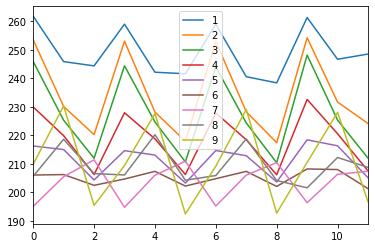

In [46]:
values_cols = [f'{i}' for i in range(1,10)]
cleaned_df = reshaped_df[values_cols]
cleaned_df.plot()

# Attempt 1
This attempt is very messy and mostly gibberish. I tried a lot of different things, and used some of them to pull from for my second attempt

In [ ]:
import pandas as pd

Read in the data, hoping that the warning will not give us any trouble. Will depend on which columsn we are interested in

In [ ]:
df = pd.read_csv('Voice_Master.csv')

Get an idea of what the data is describing

In [3]:
df.head()

,Filename,0=do not use,Label,Language,Dialect/Village,Sex,Speaker #,Speaker,Lang_Spk,Phonation,...,sB4_mean,sB4_means001,sB4_means002,sB4_means003,sB4_means004,sB4_means005,sB4_means006,sB4_means007,sB4_means008,sB4_means009
0,F19May20_sure_normal.mat,0 end,r,English,NaN,F,19,F19,English_F19,M,...,263.529,217.219,272.275,230.260,215.393,178.683,158.294,209.815,348.863,542.583
1,F19May20_sure_normal.mat,0 end,r,English,NaN,F,19,F19,English_F19,M,...,375.086,354.539,448.949,254.102,159.089,220.819,198.345,227.356,592.842,908.053
2,F19May20_sure_normal.mat,0,r,English,NaN,F,19,F19,English_F19,M,...,295.344,407.098,357.500,242.458,224.664,200.499,192.645,229.259,363.865,434.302
3,F1July22_sure_normal.mat,0 end,r,English,NaN,F,1,F1,English_F1,M,...,277.880,131.692,410.788,366.203,183.711,213.710,246.977,328.101,265.039,357.186
4,F1July22_sure_normal.mat,0 end,r,English,NaN,F,1,F1,English_F1,M,...,335.320,209.534,376.419,357.762,191.279,250.888,322.978,439.648,573.923,291.340


In [4]:
df.tail()

,Filename,0=do not use,Label,Language,Dialect/Village,Sex,Speaker #,Speaker,Lang_Spk,Phonation,...,sB4_mean,sB4_means001,sB4_means002,sB4_means003,sB4_means004,sB4_means005,sB4_means006,sB4_means007,sB4_means008,sB4_means009
16828,zhangyuanlin_95.mat,NaN,tcjiu_11,Miao,Black,M,9,M9,Miao_M9,C,...,327.336,378.439,250.337,134.721,169.282,323.310,432.931,339.113,414.309,505.629
16829,zhangyuanlin_96.mat,NaN,ji_11,Miao,Black,M,9,M9,Miao_M9,C,...,235.652,314.088,341.231,282.147,134.731,251.197,221.899,187.067,230.593,150.794
16830,zhangyuanlin_96.mat,NaN,ji_11,Miao,Black,M,9,M9,Miao_M9,C,...,209.277,434.323,346.341,103.444,92.883,199.917,207.126,172.638,112.100,214.463
16831,zhangyuanlin_97.mat,NaN,ji_11,Miao,Black,M,9,M9,Miao_M9,C,...,287.905,270.581,315.447,341.351,156.315,392.650,287.414,175.332,246.023,407.812
16832,zhangyuanlin_97.mat,NaN,ji_11,Miao,Black,M,9,M9,Miao_M9,C,...,194.415,290.551,162.938,170.563,218.658,334.173,182.692,88.381,123.813,178.586


# Reshape data
The value that we interested in are the different quantitative metrics that describe the signal of the spoken word. There are several values (shrF0_mean, H1_mean, H2_mean, H4_mean, H1-H2_mean etc), and each of these values has a corresponding column that represents the mean of that value at a specific time interval. The time intervals range from 001 to 009

In [5]:
column_list = list(df.columns)
# these are not all of the measurements, but give a good idea of what the data is presenting
acoustic_measurements = ['H1', 'H2', 'H4', 'A1', 'A2', 'A3', 'shrF0', 'strF0', 'sF0', 'pF0']
def in_measurements(column):
    for a in acoustic_measurements:
        if a in column:
            return True
    return False
filtered_columns = list(filter(in_measurements, column_list))
print(filtered_columns)

['H1c_mean', 'H1c_means001', 'H1c_means002', 'H1c_means003', 'H1c_means004', 'H1c_means005', 'H1c_means006', 'H1c_means007', 'H1c_means008', 'H1c_means009', 'H2c_mean', 'H2c_means001', 'H2c_means002', 'H2c_means003', 'H2c_means004', 'H2c_means005', 'H2c_means006', 'H2c_means007', 'H2c_means008', 'H2c_means009', 'H4c_mean', 'H4c_means001', 'H4c_means002', 'H4c_means003', 'H4c_means004', 'H4c_means005', 'H4c_means006', 'H4c_means007', 'H4c_means008', 'H4c_means009', 'A1c_mean', 'A1c_means001', 'A1c_means002', 'A1c_means003', 'A1c_means004', 'A1c_means005', 'A1c_means006', 'A1c_means007', 'A1c_means008', 'A1c_means009', 'A2c_mean', 'A2c_means001', 'A2c_means002', 'A2c_means003', 'A2c_means004', 'A2c_means005', 'A2c_means006', 'A2c_means007', 'A2c_means008', 'A2c_means009', 'A3c_mean', 'A3c_means001', 'A3c_means002', 'A3c_means003', 'A3c_means004', 'A3c_means005', 'A3c_means006', 'A3c_means007', 'A3c_means008', 'A3c_means009', 'H1H2c_mean', 'H1H2c_means001', 'H1H2c_means002', 'H1H2c_means0

The data splits multiple samples from the same audio file into different rows, which correspond with a word being spoken in an audio file. Each of these rows has repeated information in several columns as it stays consistent across the same speaker. The value count of each file name corresponds to how many times a word was spoken for that specific file. 

In [6]:
df['Filename'].value_counts()

M24April09_shi_normal.mat    16
F21May14_shi_normal.mat      13
F19June26_shi_normal.mat     12
M21May23_shi_normal.mat      12
F22June02_shi_normal.mat     12
                             ..
35-vus-w_Audio.mat            1
21-ca-w_Audio.mat             1
23e-tawg-w_Audio.mat          1
5-caj-w_Audio.mat             1
M3_04_b.mat                   1
Name: Filename, Length: 8134, dtype: int64

This means that we have several samples from one audio file, and within each of those samples, samples of the acoustic measurements at different intervals (9 to be exact).

In [7]:
# group by filename, which gives us many data frames for each file name
groups = df.groupby('Filename')

# this corresponds with the largest group shown by the value counts above
largest_group_df = groups.get_group('M24April09_shi_normal.mat')

# we want to get how many unique values there are for each columns
unique_columns = largest_group_df.nunique()

# this gives us a series where the values are only one
columns_repeat = unique_columns[unique_columns == 1]

# the corresponding list is the all of the columns which have repeats for every 
# row in the group
list_columns_repeat = list(columns_repeat.index)
print(list_columns_repeat)

['Filename', '0=do not use', 'Language', 'Dialect/Village', 'Sex', 'Speaker #', 'Speaker', 'Lang_Spk', 'Phonation', 'Lphon', 'Vowel', 'Oral/Nasal', 'CorV', 'Pre_C', 'Aspiration']


# Stack the data
We would like to index the data such that all of the repeat information in the columns for the same file is not repeated

In [27]:
stacked_df = df.set_index(list_columns_repeat)
melt_df = stacked_df
working_additions = []
for i in range(1,3):
    print(i)
    string = f'means00{i}'
    columns = list(melt_df.columns)
    melt_vars = [k for k in columns if string in k]
    id_vars =[l for l in columns if l not in melt_vars]
    id_vars = [l for l in id_vars if l not in working_additions]
    var_name = f"acoustic_means_00{i}"
    value_name = f"means_00{i}"
    melt_df = pd.melt(melt_df, id_vars=id_vars, value_vars=melt_vars, var_name=var_name, value_name=value_name)
    working_additions.append(var_name)
    working_additions.append(value_name)
melt_df

1
2


KeyboardInterrupt: 

In [ ]:
# largest_group_df_indexed
columns = list(df.columns)
melt_vars = [i for i in columns if 'means001' in i]
id_vars =[l for l in columns if l not in melt_vars]
melt_df = pd.melt(df, id_vars=id_vars)
melt_df

In [ ]:
# means = [f'shrF0_means00{i}' for i in range(1,10)]
# melt_vars = ['shf_mean'] + means
melt_vars = ['shrF0_means001']
id_vars =[l for l in list(largest_group_df.columns) if l not in melt_vars]
largest_group_melt_df = pd.melt(largest_group_df, id_vars=id_vars)
largest_group_melt_df